![title](https://qph.fs.quoracdn.net/main-qimg-d13baac8e5fdf8e18954ac6d0bad09de)

# #16: Plot Lifecycle

- Mempelajari Lifecycle dari proses plotting dengan Matplotlib

## Import modules

- `%matplotlib inline` untuk memanggil magic comment. Fungsinya untuk meredirect hasil output dari matplotlib ke tampilan jupyer   notebook di halaman notebook yang sama
- Kode di bawah ini untuk memberi tahu berapa versi matplotlib dan numpy kalian

In [5]:
%matplotlib inline

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

print(matplotlib.__version__)
print(np.__version__)

3.3.2
1.19.2


## Sample dataset

- Membentuk sample dataset yang akan dibentuk dari suatu dictionary
- Sekumpulan keys/values yang dihasilkan akan ditampung ke dalam suatu tuple
- Tuple tersebut nantinya akan ditampung ke dalam variabel dengan nama items/count

In [10]:
data = {'Item A': 109438,
        'Item B': 103569,
        'Item C': 112214,
        'Item D': 112591,
        'Item E': 100934,
        'Item F': 103660,
        'Item G': 137351,
        'Item H': 123381,
        'Item I': 135841,
        'Item J': 104437,}
data

{'Item A': 109438,
 'Item B': 103569,
 'Item C': 112214,
 'Item D': 112591,
 'Item E': 100934,
 'Item F': 103660,
 'Item G': 137351,
 'Item H': 123381,
 'Item I': 135841,
 'Item J': 104437}

- Mengekstrak keys dari suatu dictionary

In [11]:
items = tuple(data.keys()) 
items

('Item A',
 'Item B',
 'Item C',
 'Item D',
 'Item E',
 'Item F',
 'Item G',
 'Item H',
 'Item I',
 'Item J')

- Mengekstrak values dari suatu dictionary

In [12]:
count = tuple(data.values()) 
count

(109438,
 103569,
 112214,
 112591,
 100934,
 103660,
 137351,
 123381,
 135841,
 104437)

## Simple Plot

- Plotting horizontal bar plot
- Fungsi `plt.subplots()` untuk mengembalikan dua buah objek
- Objek pertama adalah objek figure yang ditampung ke dalam `fig`
- Objek kedua adalah objek axes yang ditampung ke dalam `ax`

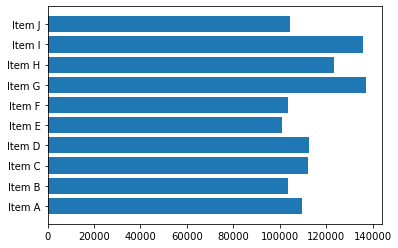

In [13]:
fig, ax = plt.subplots()

ax.barh(items, count) 

plt.show()

## Pengaturan Style

In [14]:
plt.style.available 

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

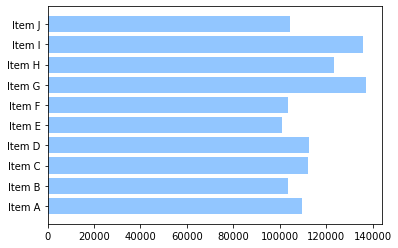

In [15]:
plt.style.use('seaborn-pastel')

fig, ax = plt.subplots()
ax.barh(items, count)
plt.show()

## Pengaturan Tick Label

- Tick label sumbu x akan dicetak dengan rotasi 45 derajat
- `ax.get_xticklabels` digunakan untuk mendapatkan akses terhadap objeck dari tick label yang berada pada sumbu x

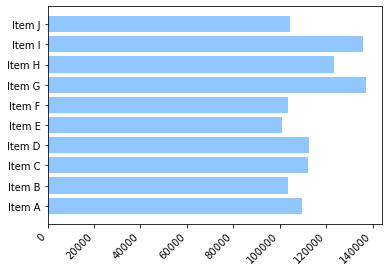

In [16]:
fig, ax = plt.subplots()
ax.barh(items, count)

labels = ax.get_xticklabels()

# set properties
plt.setp(labels,
        rotation=45,
        horizontalalignment='right')
plt.show()

## Pengaturan Format pada Ticker

- Membentuk object `FuncFormatter` 
- Fungsi `ribuaan` akan menerima parameter x dan pos, dimana x merupakan nilai yang akan dikonversi dan pos merupakan posisinya

In [17]:
from matplotlib.ticker import FuncFormatter

In [18]:
def ribuan(x, pos):
    return f'{int(x/1000)}K'

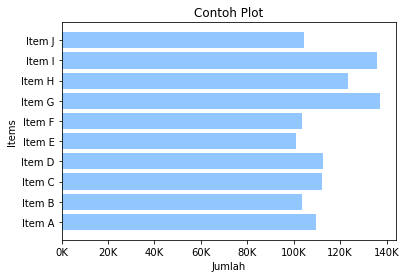

In [19]:
fig, ax = plt.subplots()
ax.barh(items, count)

formatter = FuncFormatter(ribuan)
ax.xaxis.set_major_formatter(formatter)

ax.set(title='Contoh Plot',
       xlabel='Jumlah',
       ylabel='Items')

plt.show()


## Pengaturan Label pada Sumbu (axis) dan Judul (title)

- Fungsi `ax.set` adalah untuk melakukan pengaturan title x label dan y label secara sekaligus

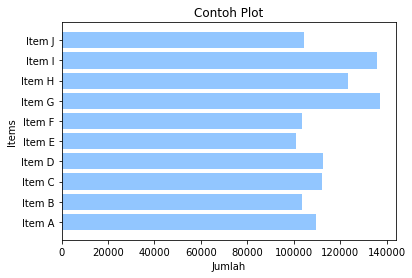

In [20]:
fig, ax = plt.subplots()
ax.barh(items, count)

ax.set(title='Contoh Plot',
       xlabel='Jumlah',
       ylabel='Items')

plt.show()

## Penambahan Garis (vertical/horisontal line) pada Plot

- `ax.axvline` artinya adalah garis vertical pada axes

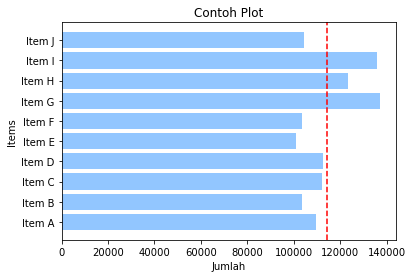

In [25]:
fig, ax = plt.subplots()
ax.barh(items, count)

ax.axvline(np.mean(count),
           ls='--',
           color='r')

ax.set(title='Contoh Plot',
       xlabel='Jumlah',
       ylabel='Items')

plt.show()

## Menyimpan Hasil Plot ke dalam suatu File

- `fig.canvas.get_supported_filetypes()` untuk melihat type file apa saja yang didukung oleh matplotlib
- `fig.savefig` fungsinya untuk menyimpan file
- `dpi` adalah resolusi
- Secara default file yang dihasilkan di bawah akan ditempatkan pada direktori yang sama dengan direktori di notebook kita ini

In [26]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

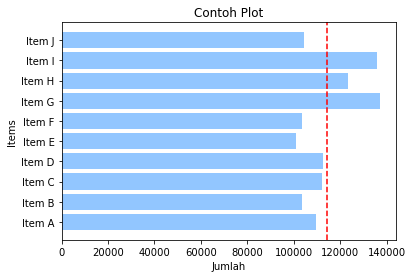

In [27]:
fig, ax = plt.subplots()
ax.barh(items, count)

ax.axvline(np.mean(count),
           ls='--',
           color='r')

ax.set(title='Contoh Plot',
       xlabel='Jumlah',
       ylabel='Items')

fig.savefig('sales.png',
            transparent=False,
            dpi=80)